
#Utsav Jitendrabhai Patel



In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [ ]:
#Importing google drive path
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing csv file
path = "/content/drive/MyDrive/Assignment3/Assign03/Assign03/Mall_Customers.csv"
df = pd.read_csv(path)

In [ ]:
#Displaying csv file
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Checking null values because that is easy for performing function
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#Fitting 2 main factor values in x
X=df[["Annual Income (k$)","Spending Score (1-100)"]]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
#Displaying first 5 values
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [ ]:
#Standardization(Scaling data)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(X)
data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

# Use dendrogram method to find the optimal number of clusters

In [ ]:
#Importing library for hirarchical cluster
import scipy
from scipy.cluster import hierarchy as h

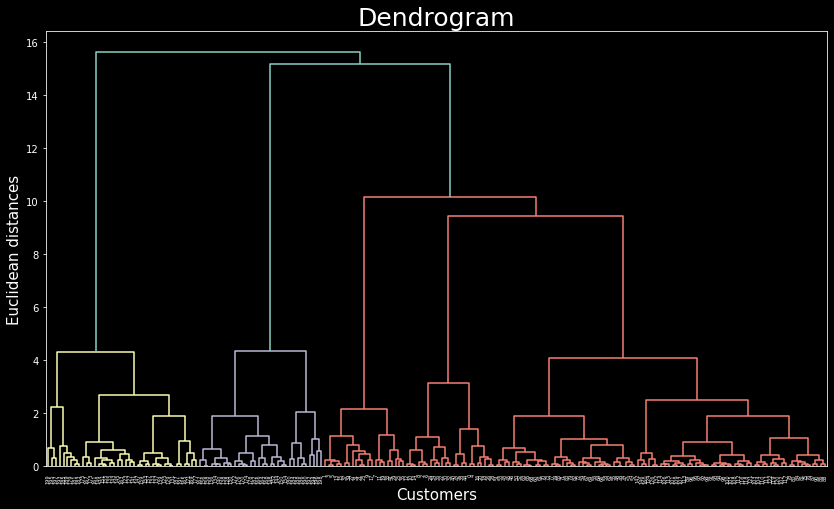

In [ ]:
#Ploting the dendogram figure
plt.figure(figsize = (14,8))
dendrogram = h.dendrogram(h.linkage(data, method = 'ward'))  # method "ward" minimize the variance inside the cluster.
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

## Applying Hierarchical Clustering to train the model

In [ ]:
#training the data
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(data)

In [ ]:
#Displaying the trained data
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

## Visualize the clusters

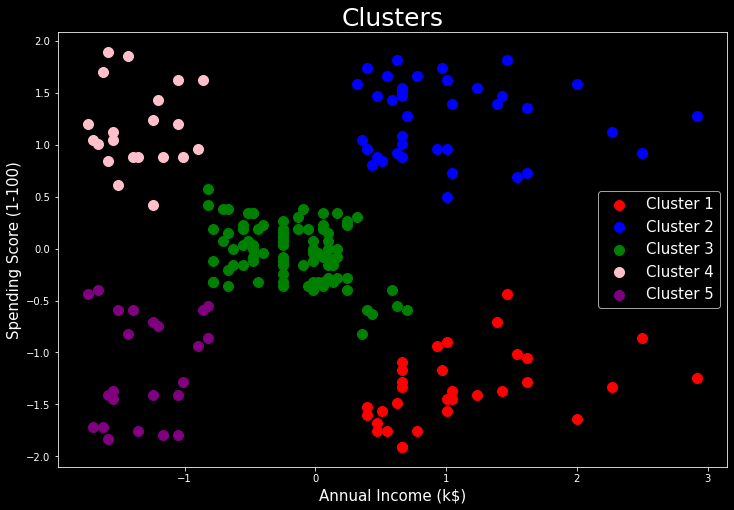

In [ ]:
#ploting digram of cluster
plt.figure(figsize = (12,8))
data = np.array(data)
plt.scatter(data[y_pred == 0, 0], data[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_pred == 1, 0], data[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[y_pred == 2, 0], data[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[y_pred == 3, 0], data[y_pred == 3, 1], s = 100, c = 'pink', label = 'Cluster 4')
plt.scatter(data[y_pred == 4, 0], data[y_pred == 4, 1], s = 100, c = 'purple', label = 'Cluster 5')
plt.title('Clusters', fontsize = 25)
plt.xlabel('Annual Income (k$)', fontsize = 15)

plt.ylabel('Spending Score (1-100)', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [ ]:
#IMPORTING LIBRARY
from sklearn.metrics import silhouette_score

# Evaluating Hierarchical Clustering performance by Silhouette Score

# For 5 clusters

In [ ]:
#Printing Silhouttev score for 5 cluster
print(f'Silhouette Score(n = 5) : {silhouette_score(data, y_pred)}')

Silhouette Score(n = 5) : 0.5538089226688662


# For 4 clusters

In [ ]:
#Printing Silhouttev score for 4 cluster

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(data)
print(f'Silhouette Score(n = 4) : {silhouette_score(data, y_pred)}')

Silhouette Score(n = 4) : 0.4925507715349343


# For 3 clusters

In [ ]:
#Printing Silhouttev score for 3 cluster

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(data)
print(f'Silhouette Score(n = 3) : {silhouette_score(data, y_pred)}')

Silhouette Score(n = 3) : 0.4610481446570447


# For 6 clusters

In [ ]:
#Printing Silhouttev score for 6 cluster

hc = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(data)
print(f'Silhouette Score(n = 6) : {silhouette_score(data, y_pred)}')

Silhouette Score(n = 6) : 0.5386761871036926


## Evaluating K-means performance by Calinski-Harabasz(CH)Index for 5 clusters




In [ ]:
#For 5-clusters
import sklearn
sklearn.metrics.calinski_harabasz_score(X, y_pred)

232.46420120838107

#K-Means is that it needs us to pre-enter the number of clusters (K) but Hierarchical clustering has no such requirements. The algorithm on itself deduces the optimum number of cluster and displays it form of dendrogram.
#For this data in kmean clustering we need to first find the cluster no. but for hirarchical we do not need to do. 
#For k mean we need centroid but hirarchical we don't need.